In [1]:
# creating spectrograms from all the files, and saving split labelled versions to disk ready for machine learning
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import cPickle as pickle
import numpy as np

# from data_helpers import load_annotations

# annotation_pkl_dir = '/media/michael/Seagate/engage/alison_data/golden_set/extracted/annotations/'
# savedir = '/media/michael/Seagate/engage/alison_data/golden_set/extracted/specs/'

annotation_pkl_dir = '/media/michael/Engage/data/audio/alison_data/large_dataset/annots/'
savedir = '/media/michael/Engage/data/audio/alison_data/large_dataset/specs/'


In [2]:
def gen_spec(x, sr):
    specNStepMod = 0.01    # horizontal resolution of spectogram 0.01
    specNWinMod = 0.03     # vertical resolution of spectogram 0.03

    ## Parameters
    nstep = int(sr * specNStepMod)
    nwin  = int(sr * specNWinMod)
    nfft = nwin

    # Get all windows of x with length n as a single array, using strides to avoid data duplication
    #shape = (nfft, len(range(nfft, len(x), nstep)))
    shape = (nfft, ((x.shape[0] - nfft - 1)/nstep)+1)
    strides = (x.itemsize, nstep*x.itemsize)
    x_wins = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)

    # Apply hamming window
    x_wins_ham = np.hamming(x_wins.shape[0])[..., np.newaxis] * x_wins

    # compute fft
    fft_mat = np.fft.fft(x_wins_ham, n=nfft, axis=0)[:(nfft/2), :]

    # log magnitude
    fft_mat_lm = np.log(np.abs(fft_mat))
    fft_mat = np.abs(fft_mat)

    return fft_mat

In [12]:
# create (multi-channel?) spectrogram
files = os.listdir(annotation_pkl_dir)

spec_type = '330'
this_save_dir = savedir + spec_type + '/'
for fname in files:
    if fname.endswith('.pkl'):

        with open(annotation_pkl_dir + fname) as f:
            annots, wav, sample_rate = pickle.load(f)

        spec = gen_spec(wav, sample_rate)

        with open(this_save_dir + fname, 'w') as f:
            pickle.dump(spec, f, -1)
            
        print fname

BR20EG-13548_20150718_01300020.pkl
BR20EG-13548_20150718_08300027.pkl
BR20EG-13548_20150718_16300005.pkl
BR20EG-13548_20150718_23000014.pkl
BR20EG-13548_20150719_09300009.pkl
BR20EG-13548_20150719_10000006.pkl
BR20EG-13548_20150720_11000002.pkl
BR20EG-13548_20150720_12000019.pkl
BR20EG-13548_20150720_19000016.pkl
BR20EG-13548_20150720_20000022.pkl
BR20EG-13548_20150720_22000003.pkl
BR20EG-13548_20150721_00300022.pkl
BR20EG-13548_20150721_02000024.pkl
BR20EG-13548_20150722_14000002.pkl
BR20EG-13548_20150722_18000028.pkl
BR20EG-13548_20150723_01000008.pkl
BR20EG-13548_20150723_11000013.pkl
BR20EG-13548_20150723_22300008.pkl
BR20EG-13548_20150724_08300009.pkl
CR0-013534_20140706_09000007.pkl
CR0-013534_20140706_20300006.pkl
CR0-013534_20140707_05000014.pkl
CR0-013534_20140707_08000024.pkl
CR0-013534_20140707_12300006.pkl
CR0-013534_20140707_17000016.pkl
CR0-013534_20140708_02300028.pkl
CR0-013534_20140708_06300024.pkl
CR0-013534_20140708_07000029.pkl
CR0-013534_20140708_09000022.pkl
CR0-0

In [3]:
import librosa

N_FFT = 2048
HOP_LENGTH = 1024 # 512
N_MELS = 32 # 128

# create (multi-channel?) spectrogram
files = os.listdir(annotation_pkl_dir)

spec_type = 'mel'

this_save_dir = savedir + spec_type + '/'
for fname in files:
    if fname.endswith('.pkl'):
        if os.path.exists(this_save_dir + fname):
            continue

        with open(annotation_pkl_dir + fname) as f:
            annots, wav, sample_rate = pickle.load(f)

        spec = librosa.feature.melspectrogram(
            wav, sr=sample_rate, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
        spec = spec.astype(np.float32)

        with open(this_save_dir + fname, 'w') as f:
            pickle.dump(spec, f, -1)
            
        print fname

RM14-3YB-944_1_20130616_140200_000.pkl
HA86RB-13527_20130723_1534.pkl
CR8-13548_20130921_1528.pkl
W84LA-013548_20130627_2326.pkl
E105JP-13548_20131013_0916.pkl
NW1-013527_20130701_0804.pkl
SE3-13548_20130907_1922.pkl
CR05EF-13527_20130917_1656.pkl
W84LA-013548_20130624_1901.pkl
RM14-3YB-944_1_20130617_100500_000.pkl
WC2H8LG-3527_20130710_0654.pkl
CR05EF-13527_20130916_0431.pkl
CR05EF-13527_20130916_1738.pkl
SW112PN-3527_20130817_1552.pkl
E105JP-13548_20131011_1352.pkl
NW1-013527_20130625_0801.pkl
RM14-3YB-944_1_20130614_160800_000.pkl
W112NN-13548_20130712_0355.pkl
SW154LA-3527_20130705_2256.pkl
SE220SD-3548_20140802_0100009.pkl
RM14-3YB-944_1_20130618_010600_000.pkl
SW154LA-3527_20130702_1327.pkl
E47EN-013527_20131009_2031.pkl
E47EN-013527_20131006_1856.pkl
RM14-3YB-944_1_20130616_210700_000.pkl
SW112PN-3527_20130819_0531.pkl
W84LA-013548_20130626_2005.pkl
E47EN-013527_20131009_1613.pkl
HA86RB-13527_20130727_0010.pkl
NW1-013527_20130626_0521.pkl
SE3-13548_20130909_1113.pkl
SW112PN-352

/home/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/michael/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [45]:
import librosa

N_FFT = 2048
HOP_LENGTH = 1024 # 512
N_MELS = 64 # 128

# create (multi-channel?) spectrogram
files = os.listdir(annotation_pkl_dir)

spec_type = 'mel64'

this_save_dir = savedir + spec_type + '/'
for fname in files:
    if fname.endswith('.pkl'):

        with open(annotation_pkl_dir + fname) as f:
            annots, wav, sample_rate = pickle.load(f)

        spec = librosa.feature.melspectrogram(
            wav, sr=sample_rate, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
        spec = spec.astype(np.float32)

        with open(this_save_dir + fname, 'w') as f:
            pickle.dump(spec, f, -1)
            
        print fname

BR20EG-13548_20150718_01300020.pkl
BR20EG-13548_20150718_08300027.pkl
BR20EG-13548_20150718_16300005.pkl
BR20EG-13548_20150718_23000014.pkl
BR20EG-13548_20150719_09300009.pkl
BR20EG-13548_20150719_10000006.pkl
BR20EG-13548_20150720_11000002.pkl
BR20EG-13548_20150720_12000019.pkl
BR20EG-13548_20150720_19000016.pkl
BR20EG-13548_20150720_20000022.pkl
BR20EG-13548_20150720_22000003.pkl
BR20EG-13548_20150721_00300022.pkl
BR20EG-13548_20150721_02000024.pkl
BR20EG-13548_20150722_14000002.pkl
BR20EG-13548_20150722_18000028.pkl
BR20EG-13548_20150723_01000008.pkl
BR20EG-13548_20150723_11000013.pkl
BR20EG-13548_20150723_22300008.pkl
BR20EG-13548_20150724_08300009.pkl
CR0-013534_20140706_09000007.pkl
CR0-013534_20140706_20300006.pkl
CR0-013534_20140707_05000014.pkl
CR0-013534_20140707_08000024.pkl
CR0-013534_20140707_12300006.pkl
CR0-013534_20140707_17000016.pkl
CR0-013534_20140708_02300028.pkl
CR0-013534_20140708_06300024.pkl
CR0-013534_20140708_07000029.pkl
CR0-013534_20140708_09000022.pkl
CR0-0

In [27]:
for fname in files[20:]:
    if fname.endswith('.pkl'):

        with open(annotation_pkl_dir + fname) as f:
            annots, wav, sample_rate = pickle.load(f)

        spec = librosa.feature.melspectrogram(
            wav, sr=sample_rate, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
        spec = spec.astype(np.float32)
        sds

NameError: name 'sds' is not defined

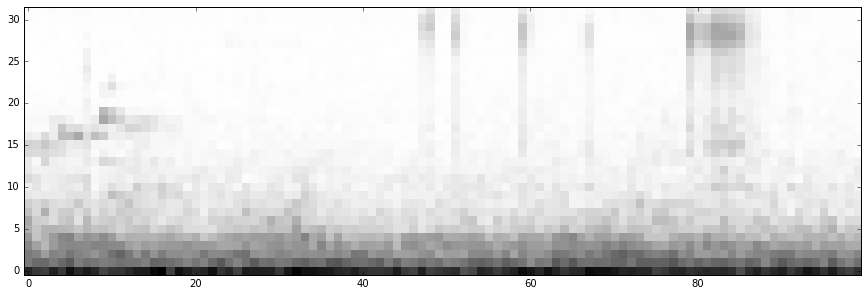

In [39]:
plt.figure(figsize=(15, 20))
plt.imshow(np.log(0.001 + spec[:, 150:250]), cmap=plt.get_cmap('gray_r'), interpolation='nearest')
plt.gca().invert_yaxis()


In [38]:
print (60.0 /spec.shape[1] ) * 10

0.46439628483
